Enter the profile data in the cell under
All units in mm (mm^4,N/mm^2, ect)

In [117]:
import numpy as np
#Enter Profile data
ProfileLength =40
ProfileWidth =40
Wallthikness =3
E = 6000
Zul =40

Il= ((ProfileWidth*(ProfileLength**3))/12)-(((ProfileWidth-Wallthikness*2)*((ProfileLength-Wallthikness*2)**3))/12)######################
Iw= ((ProfileLength*(ProfileWidth**3))/12)-(((ProfileLength-Wallthikness*2)*((ProfileWidth-Wallthikness*2)**3))/12)


#(ProfileLength*(ProfileWidth**3))/12
if ProfileLength <= ProfileWidth:
    Ip = ((np.pi*(ProfileLength**3))/32)-((np.pi*((ProfileLength-(Wallthikness*2))**3))/32)
    TR=ProfileLength/2
else:
    Ip = (np.pi*(ProfileWidth**3))/32-((np.pi*((ProfileWidth-(Wallthikness*2))**3))/32)
    TR=ProfileWidth/2

print("Il:" + str(Il) + "\nIw:" + str(Iw) + "\n")

Il:101972.00000000001
Iw:101972.00000000001



Enter the force parameters

In [118]:
#Enter force data
Ftot = 25
Dfx = 280
Dfy = 160

#Moment in Nm
MomentCNm = 10

MomentC = MomentCNm*1000



Enter the simulation paramters

In [119]:

#Simulation Param
Res = 1     #number of cell per mm (1 def)
Scale_of_graph = 15 #Scale of graph (inches)
Force_relative_to_corner = False #Where the force center is placed
Calculate_Torsion = False

if Force_relative_to_corner:
    Mx = (Dfx + ProfileLength/2)*(Ftot*np.sin(np.tan(Dfy/Dfx)))
    My = (Dfy + ProfileWidth/2)*(Ftot*np.cos(np.tan(Dfy /Dfx)))
else:
    Mx = Dfx*(Ftot*np.sin(np.tan(Dfy/Dfx)))
    My = Dfy*(Ftot*np.cos(np.tan(Dfy/Dfx)))

#if Calculate_Torsion:####################################################################


Simulation matrix and misc Setup

In [120]:
Rows = ProfileLength*Res
Column = ProfileWidth*Res
EfInt = [[0 for _ in range(Rows)] for _ in range(Column)]
i = 0
j = 0
'''
for i in range(len(EfInt)):
    for j in range(len(EfInt[0])):
        EfInt[i][j] = ((-Mx*((i-(Rows/2))/Res))/Il)+((-My*((j-(Column/2))/Res))/Iw)
'''
for i in range(len(EfInt)):
    for j in range(len(EfInt[0])):
        if j>=(ProfileLength-Wallthikness)*Res or i>=(ProfileWidth-Wallthikness)*Res or i<(Wallthikness)*Res or j<(Wallthikness)*Res:
            EfInt[i][j] = ((-My*((i-(Column/2))/Res))/Il)+((-Mx*((j-(Rows/2))/Res))/Iw)
        else:
            EfInt[i][j] = 0


Generate the graph

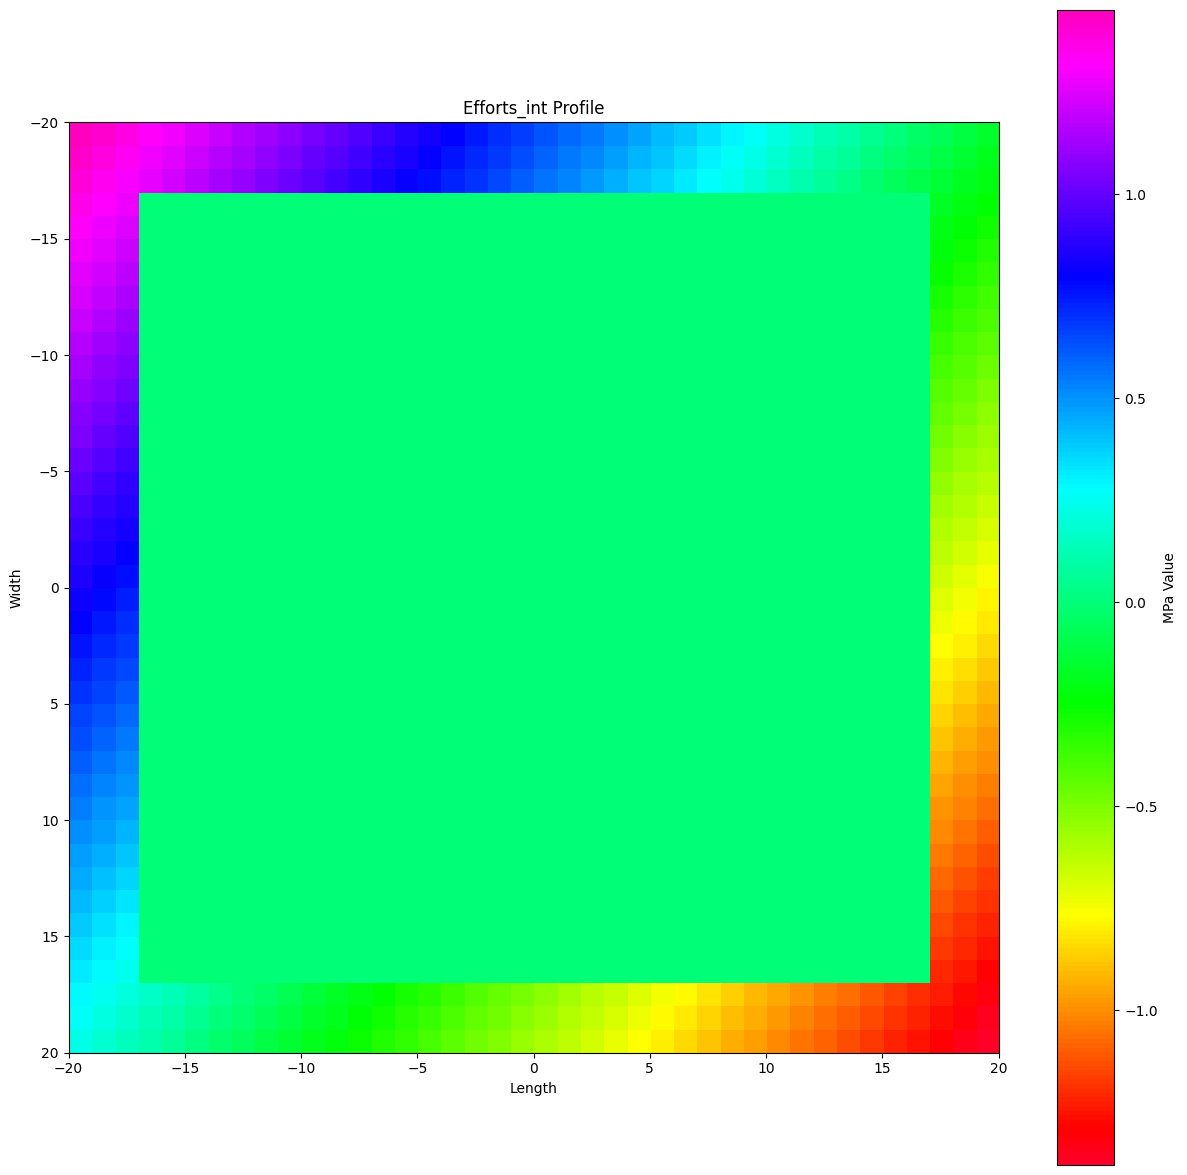

Max Stress: 1.451055252052766 [MPa]
Min Stress: -1.3785024894501277 [MPa]
Max Torsion Stress: 82.49041430095 [MPa]


In [121]:
import matplotlib.pyplot as plt
from matplotlib import cm

grid = np.array(EfInt)
plt.figure(figsize=((Scale_of_graph*(Rows/Column)), (Scale_of_graph*(Column/Rows))))

plt.imshow(grid,
           extent=(-ProfileLength/2, ProfileLength/2, ProfileWidth/2, -ProfileWidth/2),
           interpolation='nearest',
           cmap=cm.gist_rainbow)


plt.colorbar(label='MPa Value')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Efforts_int Profile')
plt.show()


#max and min values
max_stress = np.max(grid)
min_stress = np.min(grid)
Max_Torsion_stress = (MomentC*TR)/Ip

print("Max Stress: " + str(max_stress) + " [MPa]" "\n"  "Min Stress: " +  str(min_stress) + " [MPa]")
print("Max Torsion Stress: " + str(Max_Torsion_stress) + " [MPa]")
